In [21]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# Load Iris dataset
iris = load_iris()

# Let's say we want to reduce the data to three dimensions
pca = PCA(n_components=3)

In [22]:
# Fit and transform the data
iris_pca = pca.fit_transform(iris.data)


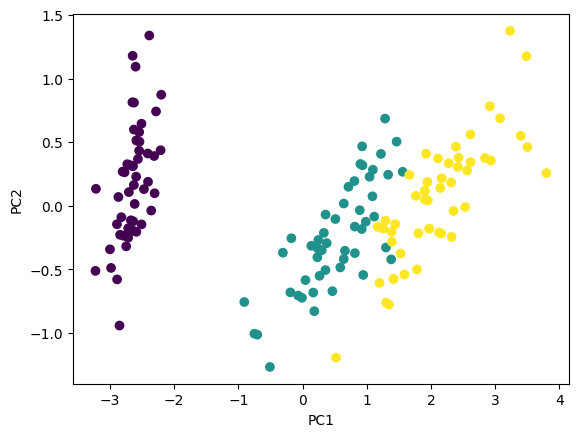

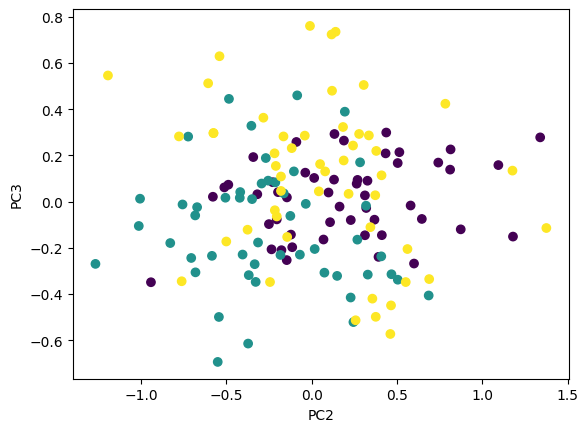

In [23]:
# Now we can plot the first two principal components
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
# Now we can plot the 2 and 3 principal components
plt.scatter(iris_pca[:,1], iris_pca[:,2], c=iris.target)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

In [33]:
iris_pca

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [32]:
iris_pca.mean(axis=0)

array([-3.03164901e-15, -9.00020799e-16, -3.40468394e-16])

## DO PCA on TIPs dataset?


In [24]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [25]:
# load the data
tips = sns.load_dataset('tips')

In [26]:
# preporcessing
# encode categorical data 

le = LabelEncoder()
cat_features = tips.select_dtypes(include='category').columns

for features in cat_features:
    tips[features] = le.fit_transform(tips[features])

In [27]:
# standardize the data
scaler = StandardScaler()
tips_scaled = scaler.fit_transform(tips)

In [28]:
# apply PCA

pca = PCA()
X_pca = pca.fit_transform(tips_scaled)


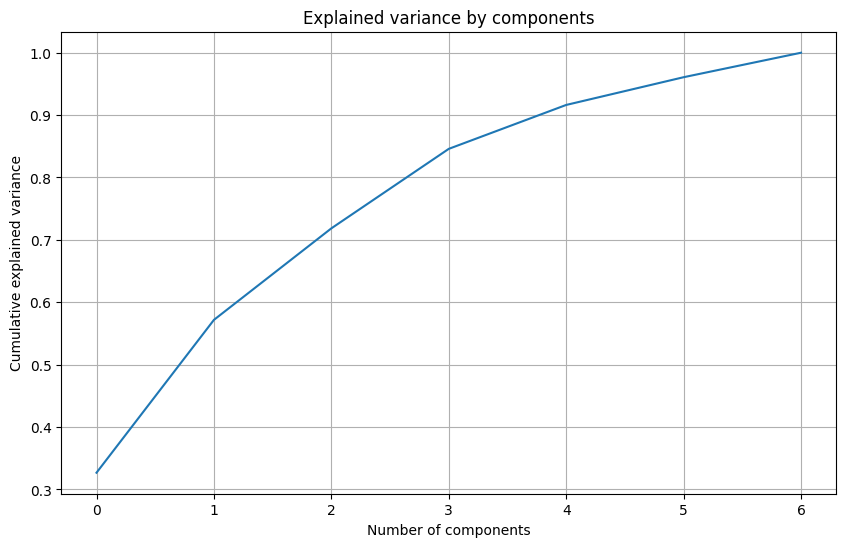

In [29]:
# plot the explained variance ratio
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by components')
plt.grid(True)
plt.show()

In [30]:
# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=tips.columns)
print(loadings)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
total_bill  0.577289  0.133642  0.164816  0.061756  0.058183 -0.378659   
tip         0.531650  0.178333  0.159316 -0.010375  0.637807  0.274214   
sex         0.189111 -0.152571 -0.588523  0.762364 -0.000506  0.115541   
smoker      0.036649 -0.335732  0.724260  0.501763 -0.212334 -0.111732   
day        -0.156579  0.660434 -0.047053  0.229846 -0.003218 -0.606759   
time       -0.281249  0.556479  0.266919  0.297170  0.004329  0.572115   
size        0.493317  0.261729 -0.055523 -0.148236 -0.738039  0.245190   

                 PC7  
total_bill -0.686390  
tip         0.421978  
sex        -0.007162  
smoker      0.228151  
day         0.340735  
time       -0.352618  
size        0.241370  


<Axes: xlabel='PC1', ylabel='PC2'>

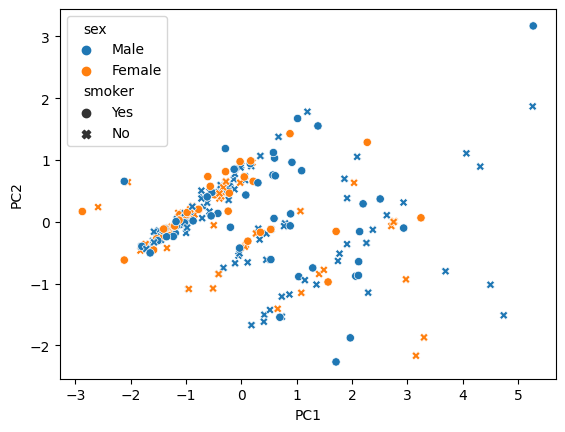

In [34]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker')

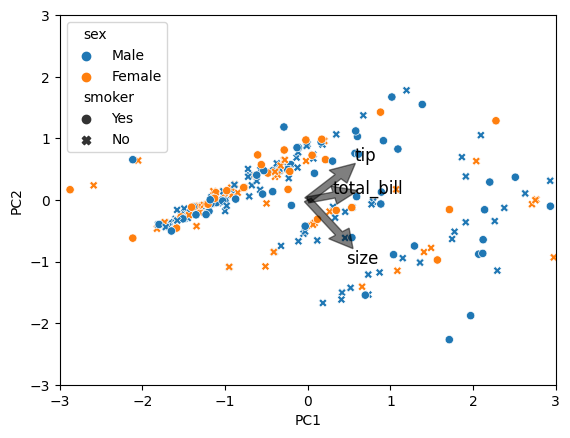

In [36]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker')

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    plt.arrow(0, 0, feature[0], feature[1], color='black', alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(feature[0]*1.2, feature[1]*1.2, X.columns[i], color='black', ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')
# Show the plot
plt.show()





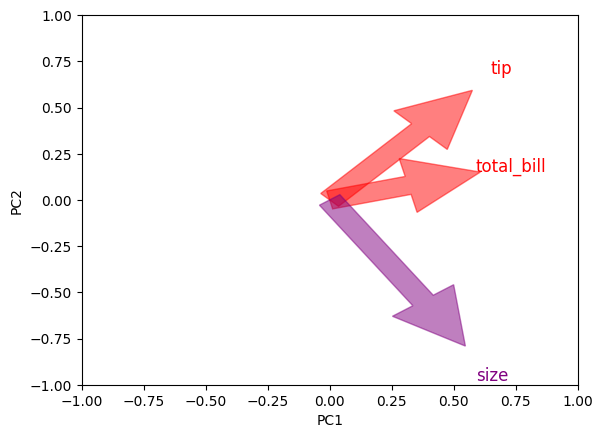

In [38]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()



## Diamonds

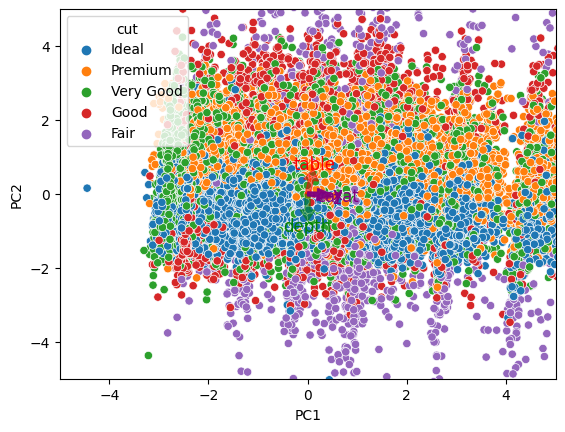

In [45]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')
diamonds.head()
# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)
# Transform the data into the principal component space
X_pca = pca.transform(X)
# Add the principal components to the dataset
diamonds['PC1'] = X_pca[:, 0]
diamonds['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=diamonds, hue='cut')

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()



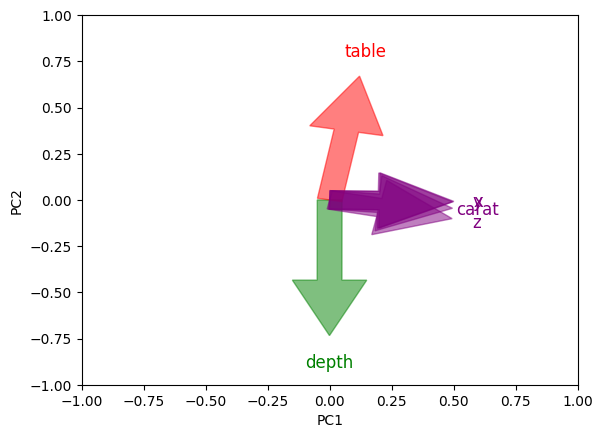

In [46]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

            PC1       PC2
carat  0.495367 -0.045130
depth -0.000682 -0.734082
table  0.120581  0.669827
x      0.500910 -0.008204
y      0.495218 -0.009657
z      0.493882 -0.101283


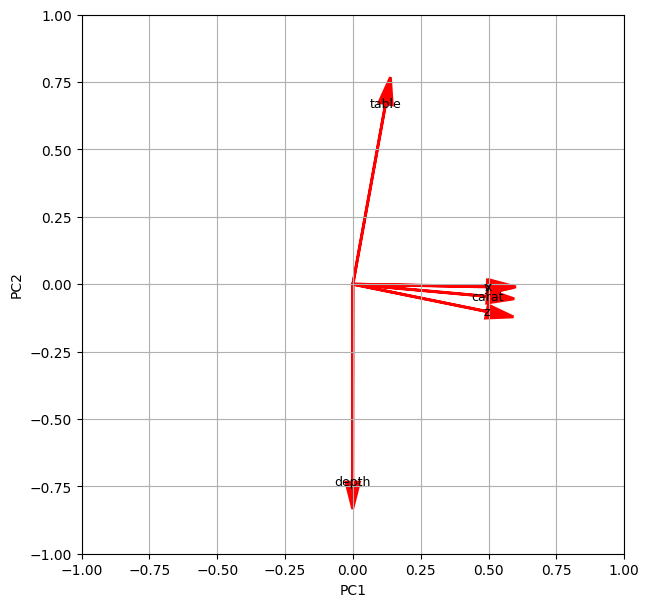

In [48]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print(loadings)

# Add arrows indicating the direction and strength of each original feature in the principal component space
plt.figure(figsize=(7,7))
for i, v in enumerate(pca.components_.T):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, fc='r', ec='r')
    plt.text(v[0], v[1], X.columns[i], color='black', ha='center', va='center', fontsize=9)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.grid()
plt.show()

            PC1       PC2       PC3       PC4       PC5       PC6
carat  0.495367 -0.045130 -0.027908 -0.789965 -0.160215  0.319502
depth -0.000682 -0.734082  0.671001  0.014030 -0.088358 -0.053638
table  0.120581  0.669827  0.732523  0.013456 -0.002961  0.003431
x      0.500910 -0.008204 -0.069979 -0.040759  0.048632 -0.860290
y      0.495218 -0.009657 -0.086227  0.537622 -0.635140  0.234074
z      0.493882 -0.101283  0.007509  0.291338  0.748831  0.316450


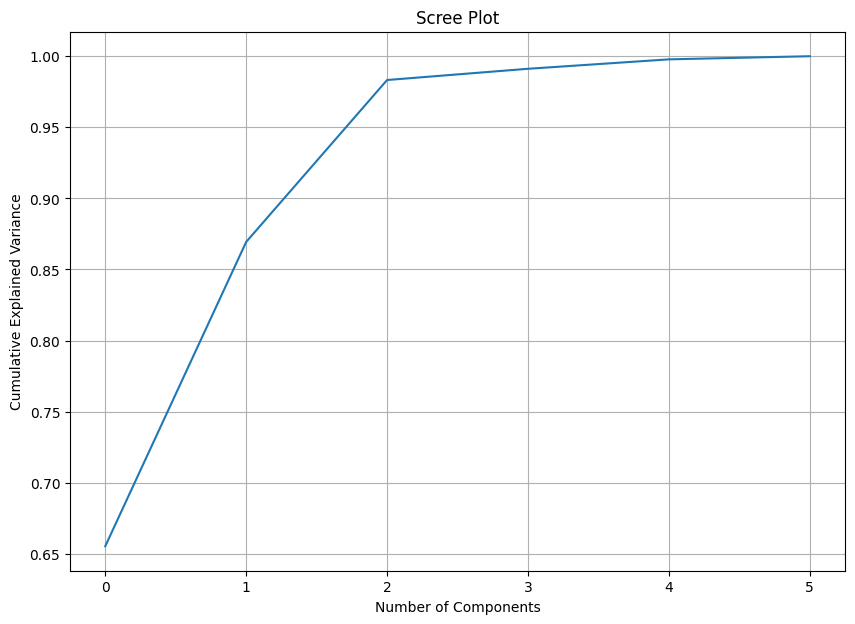

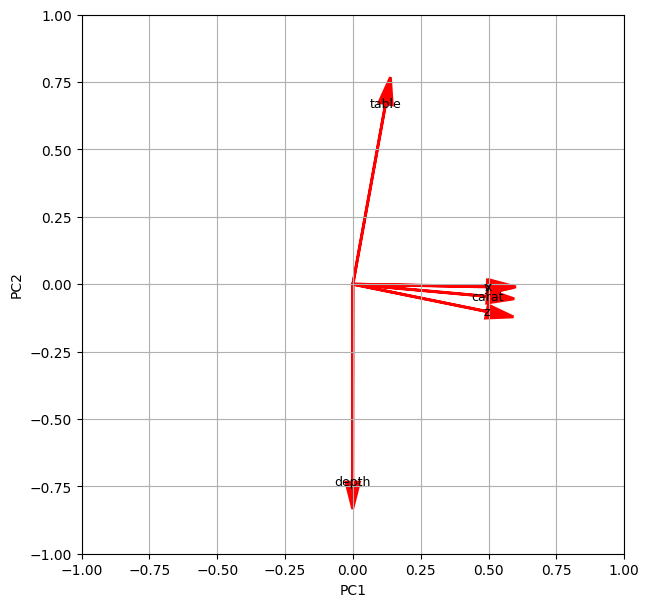

In [49]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with all components
pca = PCA()
pca.fit(X)

# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)
print(loadings)

# Plot the explained variance (Scree Plot)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Add arrows indicating the direction and strength of each original feature in the principal component space
plt.figure(figsize=(7,7))
for i, v in enumerate(pca.components_.T):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, fc='r', ec='r')
    plt.text(v[0], v[1], X.columns[i], color='black', ha='center', va='center', fontsize=9)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.grid()
plt.show()

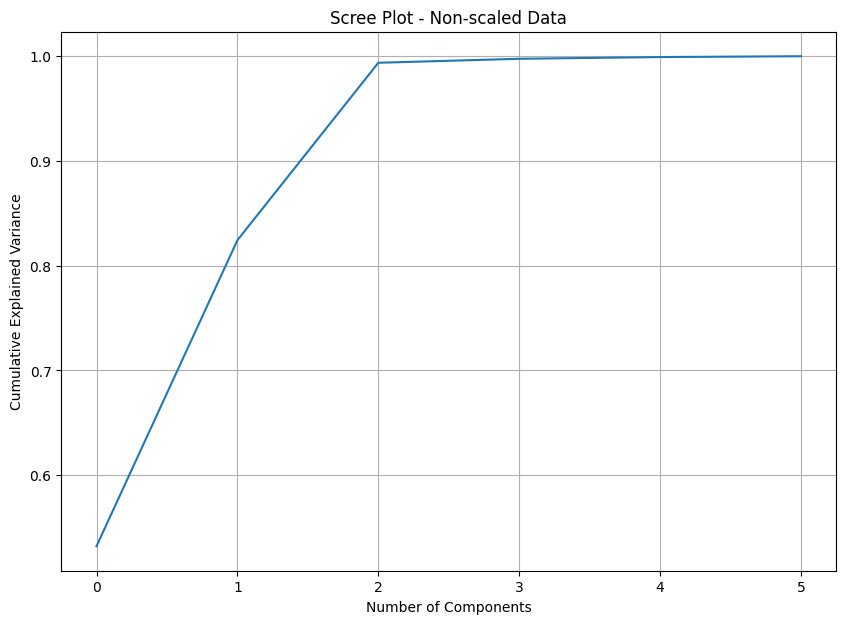

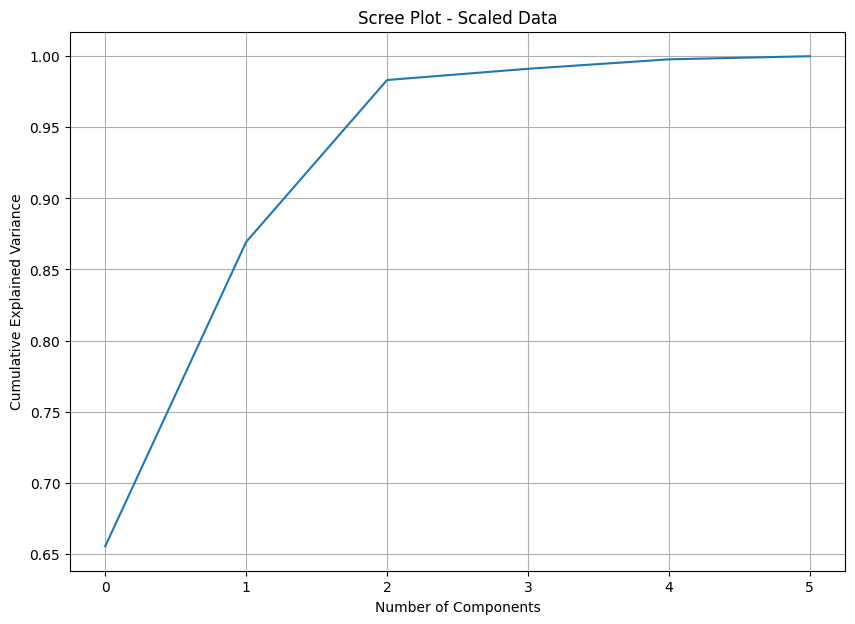

In [50]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Perform PCA on non-scaled data
pca_non_scaled = PCA()
pca_non_scaled.fit(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA on scaled data
pca_scaled = PCA()
pca_scaled.fit(X_scaled)

# Plot the explained variance (Scree Plot) for non-scaled data
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_non_scaled.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Non-scaled Data')
plt.grid(True)
plt.show()

# Plot the explained variance (Scree Plot) for scaled data
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_scaled.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Scaled Data')
plt.grid(True)
plt.show()

## SVD (Singular value decomposition)

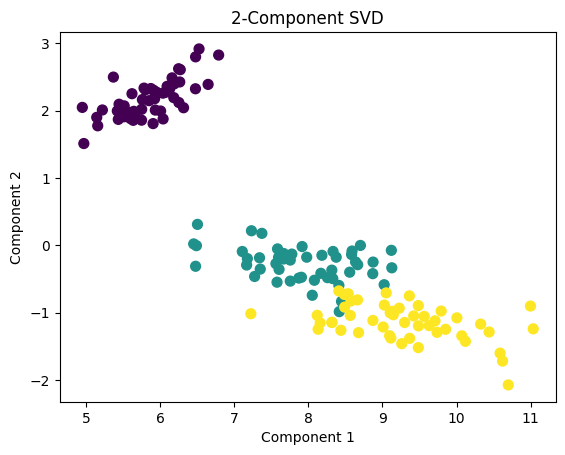

In [1]:
# import necessary libraries
from sklearn.decomposition import TruncatedSVD
from sklearn import datasets
import matplotlib.pyplot as plt

# load iris dataset as an example
iris = datasets.load_iris()
X = iris.data
y = iris.target

# SVD represent documents and terms in vectors 
svd = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=122)
X_svd = svd.fit_transform(X)

# plot the result
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, s=50, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2-Component SVD')
plt.show()

## T-distributed Stochastic Neighbor Embedding (t-SNE) Algorithm

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.
It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples
## What is Dimensionality Reduction? 
Dimensionality Reduction represents n-dimensions data(multidimensional data with many features) in 2 or 3 dimensions. An example of dimensionality reduction can be discussed as a classification problem i.e. student will play football or not that relies on both temperature and humidity can be collapsed into just one underlying feature since both features are correlated to a high degree. Hence, we can reduce the number of features in such problems. A 3-D classification problem can be hard to visualize, whereas a 2-D one can be mapped to simple 2-dimensional space and a 1-D problem to a simple line.


## What is the difference between PCA and t-SNE algorithm?
Even though PCA and t-SNE both are unsupervised algorithms that are used to reduce the dimensionality of the dataset. PCA is a deterministic algorithm to reduce the dimensionality of the algorithm and the t-SNE algorithm a randomized non-linear method to map the high dimensional data to the lower dimensional. The data that is obtained after reducing the dimensionality via the t-SNE algorithm is generally used for visualization purpose only.

One more thing that we can say is an advantage of using the t-SNE data is that it is not effected by the outliers but the PCA algorithm is highly affected by the outliers because the methodologies that are used in the two algorithms is different. While we try to preserve the variance in the data using PCA algorithm we use t-SNE algorithm to retain teh local structure of the dataset.

## How does t-SNE work? 
t-SNE a non-linear dimensionality reduction algorithm finds patterns in the data based on the similarity of data points with features, the similarity of points is calculated as the conditional probability that point A would choose point B as its neighborr. 

It then tries to minimize the difference between these conditional probabilities (or similarities) in higher-dimensional and lower-dimensional space for a perfect representation of data points in lower-dimensional space. The difference between the two conditional probabilities is calculated using the Kullback-Leibler divergence.


**Space and Time Complexity**

The algorithm computes pairwise conditional probabilities and tries to minimize the sum of the difference of the probabilities in higher and lower dimensions. This involves a lot of calculations and computations. So the algorithm takes a lot of time and space to compute. t-SNE has a quadratic time and space complexity in the number of data points.

## Perplexity

For the t-SNE algorithm, perplexity is a very important hyperparameter. It controls the effective number of neighbors that each point considers during the dimensionality reduction process. We will run a loop to get the KL Divergence metric on various perplexities from 5 to 55 with 5 points gap.



The best blog on t-SNE (https://distill.pub/2016/misread-tsne/#perplexity=14&epsilon=8&demo=0&demoParams=10)

## Kullback-Leibler (KL) divergence
The Kullback-Leibler (KL) divergence is a measure of how one probability distribution diverges from a second, expected probability distribution. In the context of t-SNE, it's used as a cost function to measure the dissimilarity between the high-dimensional distribution of points (the p_ij's) and the low-dimensional distribution (the q_ij's).

We will use Scikit-Learn’s make_classification function to generate synthetic data with 6 features, 1500 samples, and 3 classes.

After that, we will 3D plot the first three features of the data using the Plotly Express scatter_3d function.

In [1]:
import plotly.express as px
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=1500,
    n_informative=2,
    random_state=5,
    n_clusters_per_class=1,
)


fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, opacity=0.8)
fig.show()

We have a 3D plot of the data; you can also visualize the data in a 2D chart by using the Plotly Express scatter function.

We will now apply the PCA algorithm on the dataset to return two PCA components. The fit_transform learns and transforms the dataset at the same time.

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

**PCA Visualization Python**

We can now visualize the results by displaying two PCA components on a scatter plot.

x: First component y: Second companion color: target variable. We have also used the update_layout function to add a title and rename the x-axis and y-axis.

In [5]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y)
fig.update_layout(
    title="PCA visualization of Custom Classification dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

**Fitting and Transforming t-SNE**

Now we will apply the t-SNE algorithm to the dataset and compare the results.

After fitting and transforming data, we will display Kullback-Leibler (KL) divergence between the high-dimensional probability distribution and the low-dimensional probability distribution.

Low KL divergence is a sign of better results.

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
tsne.kl_divergence_

1.1273012161254883

**t-SNE Visualization Python**

In [7]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [11]:
import numpy as np

perplexity = np.arange(50, 1000, 50)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_tsne)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

In [15]:
%%time
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for t-SNE
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
# Standardize the data
X = (X - X.mean()) / X.std()
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

CPU times: total: 21min 30s
Wall time: 12min 17s


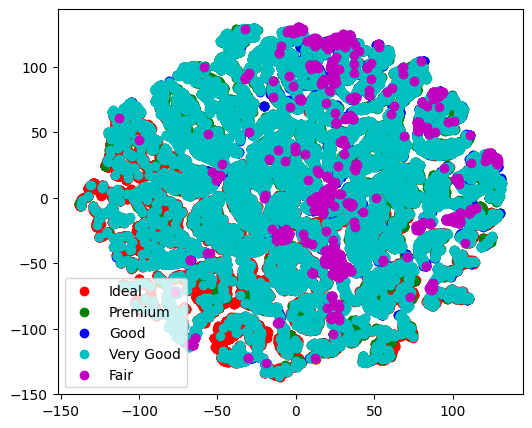

In [17]:
# Plot the results
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(range(10), colors, diamonds['cut'].unique()):
    plt.scatter(X_2d[diamonds['cut'] == label, 0], X_2d[diamonds['cut'] == label, 1], c=c, label=label)
plt.legend()
plt.show()